# 회귀와 예측

## 주 내용

### Main Sub-titles

1. 단순 선형 회귀
2. 다중 선형 회귀
3. 회귀를 이용한 예측
4. 회귀에서의 요인변수(범주형 변수)
5. 회귀방정식(모델) 해석하기
6. 가정들을 검증하기: 회귀 진단
7. 다항 회귀와 스플라인 회귀: 비선형 회귀 다루기

### 들어가면서

통계학에서 일반적인 목표 중에 하나가 바로**예측**이다. 


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

## 1. 단순 선형 회귀
* 단순 선형 회귀는 한 변수와 또 다른 변수의 크기 사이의 어떤 관계를 모델링한다. 1장에서 다룬 상관관계 역시 그 방법 중 하나이다.  

* 상관관계는 두 변수 사이의 관련 강도를 측정이라면, 회귀는 관계 자체를 정량화 하는 것이다.

* 기본적인 선형 회귀의 수식은 다음과 같다: $ Y_i = \beta_0 + \beta_1 X_i $

    -  $ \beta_0 $ 는 절편
    -  $ \beta_1 $ 는 기울기
    -  $ Y_i $ 는 응답변수 또는 종속변수 (머신러닝에서는 목표)
    -  $ X_i $ 는 예측변수 또는 독립변수 (머신러닝에서는 피처)    

In [3]:
lung_data = pd.read_csv('../data/LungDisease.csv')

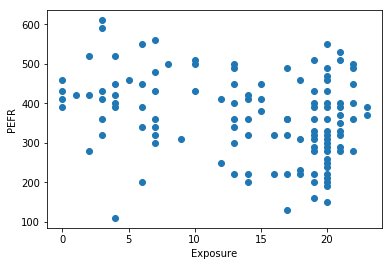

In [4]:
plt.scatter(lung_data['Exposure'],lung_data['PEFR'])
plt.xlabel('Exposure')
plt.ylabel('PEFR')
plt.show()

* 위 그림에서 단순 선형 회귀의 목적은 Exposure(면진에 대한 노출)로 응답변수 PEFR(폐활량)을 예측하기 위한 최선의 직선을 찾는 것이다.
  
  PEFR = $ b_0 + b_1노출 $

In [5]:
# initializing the input variables

X = np.array(lung_data['Exposure']).reshape(-1,1)
y = np.array(lung_data['PEFR']).reshape(-1,1)

# initiating the object for Linear Regression
lin_reg = LinearRegression()

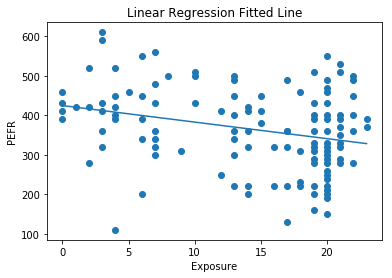

-----------------------------------------------------

The main variables in the linear regression are:

The Coefficient(b1) : [[-4.18457649]]
The Intercept(b0) : [424.58280657]


In [6]:
lin_reg.fit(X,y)
predictions = lin_reg.predict( X )

plt.scatter(lung_data['Exposure'], lung_data['PEFR'] )
plt.plot(X,predictions)
plt.xlabel('Exposure')
plt.ylabel('PEFR')
plt.title('Linear Regression Fitted Line')
plt.show()

print('-----------------------------------------------------\n')

print('The main variables in the linear regression are:\n')
print('The Coefficient(b1) :',lin_reg.coef_)
print('The Intercept(b0) :',lin_reg.intercept_)

In [7]:
# The error of the model will be:
# the idea is to reduce this error:

res_error = predictions

### 어떻게 $ b_0 $와 $ b_1 $을 찾을 수 있을까?

$ b_0 $와 $ b_1 $를 찾기 위한 방법은 최소제곱회귀 또는 보통최소제곱(Ordinary Least Squares, OLS)이다. 

$ \hat b_1 = \frac{\sum(X_i – \bar{X}) (Y_i – \bar{Y})} {\sum(X_i – \bar{X})^2} $ 

$ \hat b_0 = \bar{Y} – \hat b_1 \bar{X} $

- $ \bar{X} $는 예측변수(피처)
- $ \bar{Y} $는 응답변수(결과값)


## 2. 다중 선형 회귀

* 예측변수가 여러 개인 경우, 단순 선형 회귀로는 예측이 가능하지 않다.  회귀 방정식은 아래와 같이 여러 개의 예측변수를 포함하도록 해야한다. 

  $ Y = b_0 + b_1X_1 + b_2X_2 + ... + b_pX_p + e $
  
* 이 회귀 모델은 직선은 아니겠지만, 각 예측변수와 계수간의 관계를 여전히 선형 모형이 된다.

### 킹카운티 주택 정보 예제

* 주어진 변수로부터 판매 금액을 예측하는 것이 목표이다.


In [8]:
house_data = pd.read_csv('../data/house_sales.csv',sep='\t')

In [9]:
# Simple Linear Regression
X = np.array(house_data['SqFtLot']).reshape(-1,1)
y = np.array(house_data['AdjSalePrice']).reshape(-1,1)

lin_reg.fit(X,y)

predictions_simple_linear_regression = lin_reg.predict(X)

print('Error of Simple Linear Regression Model is :',mean_squared_error(predictions_simple_linear_regression,y)**(0.5))

Error of Simple Linear Regression Model is : 381769.33881840616


In [10]:
# Multiple Linear Regression
features = ['SqFtLot','SqFtTotLiving','Bathrooms','Bedrooms','BldgGrade']
X = np.array(house_data[features])
y = np.array(house_data['AdjSalePrice']).reshape(-1,1)

lin_reg.fit(X,y)

predictions_multiple_linear_regression = lin_reg.predict(X)

print('Error of Multiple Linear Regression Model is :',mean_squared_error(predictions_multiple_linear_regression,y)**(0.5))

Error of Multiple Linear Regression Model is : 261209.6915601493


In [11]:
house_data[features].head(5)

,SqFtLot,SqFtTotLiving,Bathrooms,Bedrooms,BldgGrade
1,9373,2400,3.00,6,7
2,20156,3764,3.75,4,10
3,26036,2060,1.75,4,8
4,8618,3200,3.75,5,7
5,8620,1720,1.75,4,7


In [12]:
# Printing coefficients of the Multiple Linear Regression
print('Intercept : %f'%lin_reg.intercept_) 
for idx in range(0, len(features)):
    print(features[idx] + ' : %e'%lin_reg.coef_[0][idx])

Intercept : -521924.722038
SqFtLot : -6.050601e-02
SqFtTotLiving : 2.288321e+02
Bathrooms : -1.943810e+04
Bedrooms : -4.778115e+04
BldgGrade : 1.061172e+05


#### 모델에 대한 Coefficient 읽기
* SqFtTotLiving: 229 --> 1제곱피트가 증가되면, 예상가격은 229달러 증가할 것이다.

### 모델 평가하기
* **제곱근 평균 제곱 오차(Root Mean Square Error, RMSE)** 이 일반적으로 평가할 수 있는 방법이다.

  $ RMSE = \sqrt { \sum_{i=1}^n (y_i - \hat y_i)^2 \over n } $
  
* 이와 유사한 **잔차 표준 오차(Residual Standard Error, RSE)** 도 있다. RMSE와의 차이점은 자유도를 고려($ p - 1 $)한 것이다.

  빅데이터인 경우 둘 간의 차이는 거의 없다고 보면 된다. (n이 매우 크기 때문)

  $ RSE = \sqrt { \sum_{i=1}^n (y_i - \hat y_i)^2 \over (n - p - 1) } $ , $ p $는 예측변수 개수
  

* **결정계수(R제곱 통계량, $ R^2 $)** 은 모델 데이터의 변동률을 측정하며 0 ~ 1까지의 범위로 표시된다.  수정 $ R^2 $는 자유도를 고려하여 수정된 결정 계수로 다중 회귀 분석에서는 크게 달라지지 않는다.

  $ R^2 = 1 - { {\sum_{i=1}^n ( y_i - \hat y_i)^2} \over {\sum_{i=1}^n ( y_i - \bar y_i)^2}} $
  
* **t 통계량** 이 높을 수록 그 에측변수는 유의미하다고 해석하면 된다. (또는 p값이 낮을수록)  

  $ t_k = {\hat b \over SE (\hat b) } $


In [13]:
features.append('AdjSalePrice')
featured_house_data = house_data[features]
result = sm.OLS.from_formula(formula='AdjSalePrice ~ SqFtLot + SqFtTotLiving + Bathrooms + Bedrooms + BldgGrade', data=featured_house_data).fit()
features.remove('AdjSalePrice')
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     5340.
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        01:13:48   Log-Likelihood:            -3.1520e+05
No. Observations:               22689   AIC:                         6.304e+05
Df Residuals:                   22683   BIC:                         6.305e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.219e+05   1.57e+04    -33.349      0.000   -5.53e+05   -4.91e+05
SqFtLot          -0.0605      0.061     -0.989      0.323      -0.180       0.059
SqFtTotLiving   228.8321      3.898     58.699      0.000     221.191     236.473
Bathrooms     -1.944e+04   3625.219     -5.362      0.000   -2.65e+04   -1.23e+04
Bedrooms      -4.778e+04   2489.443    -19.194      0.000   -5.27e+04   -4.29e+04
BldgGrade      1.061e+05   2396.136     44.287      0.000    1.01e+05    1.11e+05
==============================================================================
Omnibus:                    29679.186   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19394127.212
Skew:                           6.889   Prob(JB):                         0.00
Kurtosis:                     145.565   Cond. No.                     2.86e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 교차타당성검사(Cross-Validation, CV)

* 홀드아웃(Hold-out)은 원래 주어졌던 데이터의 일부를 떼어놓고, 모델을 만든 후 모델의 성능을 확인하는 데 사용하기 위한 표본이다.

* 데이터가 작다면, 작은 홀드아웃으로 인해 샘플의 변동성으로 인해 불확실성을 초래할 수 있다. 즉, 홀드아웃의 선택에 따라 모델의 성능 평가가 달라지게 된다.

* 교차타당성검사는 여러 번의 훈련시 각기 다른 홀드아웃으로 평가 후, 최종 모델 평가 지표를 평균과 같은 방법으로 산출하는 방법이다.  홀드아웃이 모든 레코드를 커버하도록 수행한다.

### 모형 선택과 단계적 회귀

* 많은 변수를 넣는 다고 좋은 모델을 얻을 수 있는 것은 아니다. 동일한 조건에서는 단순한 모델을 우선 사용하는 것이 좋다(오컴의 면도날).

* 변수를 추가하면 일반적으로 RMSE는 감소하고 $ R^2 $는 증가한다.  무조건 많은 변수를 추가할 수 있기 때문에 좋은 모델을 얻는데 도움이 되지 않을 수도 있다.

* AIC(Akaike's information criteria)는 모델에 항이 추가 될 수록 불이익을 주는 지표이다.

  $ AIC = 2P + n log({RSS \over n}) $, $P$는 변수의 개수, $n$은 레코드개수, $RSS$는 잔차제곱합

* AIC 지표를 활용하여, 부분집합회귀(All Subset Regression) 방법을 최적의 모델을 찾을 수도 있다.  그러나, 비용이 비싸고, 변수가 많은 경우 부분집합수가 기하급수적으로 늘 수 있다.

* 대안으로 단계적회귀(Stepwise Regression)을 사용할 수 있다.  단계적회귀에서는 변수를 추가/삭제하면서 AIC가 최소화되는 모델을 찾을 수 있다.  
 * 전진선택(Forward Selection): 변수없이 시작하여 $R^2$에 기여도가 큰 변수를 하나씩 추가해가면서 기여도가 유의미 하지 않을 때 까지 진행.
 * 후진제거(Backward Selection): 전체 변수에서 시작하여 유의미한 모델이 될때까지, 기여도가 없는 변수를 제거해나가는 반식.
 * 벌점회쉬(Penalized Selection): AIC와 개념적으로 유사. 차이점은 변수를 완전히 제거하는 것이 아니라 변수의 계수의 가중치를 감소시키거나 0으로 만든다. (Regularization 개념)


### 가중회귀

* 특정한 조건의 레코드에 대해 가중치를 부여하는 회귀 방식이다.

* 예를 들어, 주택 가격 데이터에서 오래된 매매 정보일수록 신뢰하기 어렵기때문에, 회귀모델에 낮은 가중치를 갖도록 하는 것이 좋다.  

In [15]:
# creating weighted features

# initiating the object for Linear Regression
wlin_reg = LinearRegression()

#Transform YYYY-MM-DD datetime to YYYY date and calculate weights based on 2005
weighted_house_year = pd.to_datetime(house_data['DocumentDate'])
weighted_house_year = weighted_house_year.apply(lambda x: x.strftime('%Y')).astype(int)
weighted_house_year = weighted_house_year - 2005

weighted_features = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']

X = np.array(house_data[weighted_features])
y = np.array(house_data['AdjSalePrice']).reshape(-1,1)

wlin_reg.fit(X,y, sample_weight=weighted_house_year)

predictions_weighted_linear_regression = wlin_reg.predict(X)

print('Error of Weighted Linear Regression Model is :',mean_squared_error(predictions_weighted_linear_regression,y)**(0.5))


Error of Weighted Linear Regression Model is : 261897.61980366008


In [16]:
# Printing coefficients of the Weighted Linear Regression
print('Intercept : %f'%lin_reg.intercept_) 
for idx in range(0, len(weighted_features)):
    print(weighted_features[idx] + ' : %e'%wlin_reg.coef_[0][idx])

Intercept : -521924.722038
SqFtTotLiving : 2.450173e+02
SqFtLot : -2.924287e-01
Bathrooms : -2.607917e+04
Bedrooms : -5.362540e+04
BldgGrade : 1.152590e+05


## 3. 회귀를 이용한 예측

* 회귀모델을 이용하여 예측시, 학습한 데이터 범위를 초과(Extrapolation)하면서까지 사용하는 것은 황당한 예측 결과를 초래할 수 있음을 명심해야 한다.

* 회귀를 이용한 예측에서 예측값의 불확실성은 회귀 모델 계수의 불확실성, 개발 데이터 값에 존재하는 오류에서 기인한다.  신뢰구간과 예측구간이 이를 정량화하는 방법이다.

### 신뢰구간과 예측구간

* 일반적으로 다루는 회귀모델 신뢰구간은 계수에 대한 **신뢰구간**이다. 다음의 과정을 거쳐 계수에 대한 신뢰구간을 생성한다.
 1. $n$개의 레코드를 준비한다.
 2. 무작위 복원추출(표본추출후 다시 복원) 방식으로 $n$개의 레코드를 구성하여 부트스트랩 재표본을 하나 만든다.
 3. 2의 재표본으로 회귀 모형을 만글고, 추정된 계수들을 기록한다.
 4. 2-3 과정을 1000회 반복한다.
 5. 각 계수가 1000개의 부트스트랩별 값을 갖게된다.  
 6. 각 계수에 대해 백분위수와 신뢰구간을 구한다.(ex. 90%신뢰구간은 5~95 번째 백분위수)


* 회귀계수의 **신뢰구간을 통해 불확실성을 정량화** 할 수 있다. (재표본별 회귀모델이 다르기 때문에, 동일한 레코드에 대해서 다른 예측을 할수 있다)

* 예측구간은 **회귀 모델로부터 얻은 예측값에 대한 신뢰구간**이다.  동일한 값을 가진 데이터라 하더라도, 예측값이 달라질 수 있다.  이 예측값에 대한 신뢰구간 역시 부트스트랩을 통해 잔차를 구해 모델링할 수 있다.
 

## 4. 회귀에서늬 요인변수(범주형변수)

* 범주형변수(Categorical Variable) 또는 요인변수(Factor Variable)는 개수가 제한된 이산값을 가진 데이터 종류이다. 

* 회귀분석은 수치형 데이터만을 입력값으로 받기 때문에 범주형 변수는 수치형으로 변경해야한다.

### 원-핫 인코딩 (가변수 표현)

* 범주의 개수 - 1 만큼 가변수(Dummy Variable)를 생성하여, 유무여부를 0/1로 해당 가변수에 표현하는 방법이다.

* 범주개수만큼 가변수를 생성하면 다중공선성(Multilinearity?)가 발생할 수 있다.

In [17]:
house_data.PropertyType.head(10)

1         Multiplex
2     Single Family
3     Single Family
4     Single Family
5     Single Family
6         Townhouse
7     Single Family
8     Single Family
9     Single Family
10        Multiplex
Name: PropertyType, dtype: object

In [18]:
# Using sklearn to generate one-hot encoded property type from house_data
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder(sparse=False)
#house_property = np.array(house_data['PropertyType'])
#house_property = house_property.reshape(-1, 1)
#house_property = ohe.fit_transform(house_property)

# Using pandas for same operation
house_property = pd.get_dummies(house_data['PropertyType'])
house_data = pd.concat([house_data, house_property], axis=1, sort=False)
house_data.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,Multiplex,Single Family,Townhouse
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,1991,0,0,70000,229000,98002,False,1,0,0
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,2005,0,0,203000,590000,98166,True,0,1,0
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1947,0,0,183000,275000,98166,False,0,1,0
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,1966,0,0,104000,229000,98168,False,0,1,0
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1948,0,0,104000,205000,98168,False,0,1,0


In [27]:
# From 'Multiplex', 'Single Family', 'Townhouse', added only 'Single Family' and 'Townhouse' for avoiding multilinearity
# initiating the object for Linear Regression
ohe_lin_reg = LinearRegression()

# OHE Linear Regression
ohe_features = ['SqFtLot','SqFtTotLiving','Bathrooms','Bedrooms','BldgGrade', 'Single Family', 'Townhouse']
X = np.array(house_data[ohe_features])
y = np.array(house_data['AdjSalePrice']).reshape(-1,1)

ohe_lin_reg.fit(X,y)

predictions_ohe_linear_regression = ohe_lin_reg.predict(X)

print('Error of OHE Linear Regression Model is :',mean_squared_error(predictions_ohe_linear_regression,y)**(0.5))

Error of OHE Linear Regression Model is : 260961.0517340946


In [20]:
# Printing coefficients of the OHE Linear Regression
print('Intercept : %f'%lin_reg.intercept_) 
for idx in range(0, len(ohe_features)):
    print(ohe_features[idx] + ' : %e'%ohe_lin_reg.coef_[0][idx])

Intercept : -521924.722038
SqFtLot : -7.041336e-02
SqFtTotLiving : 2.233739e+02
Bathrooms : -1.597313e+04
Bedrooms : -5.090060e+04
BldgGrade : 1.094262e+05
Single Family : -8.469138e+04
Townhouse : -1.151471e+05


* 계수에 대한 해석: 생략한 Multiplex에 비한 상대적인 값으로 해석해야 한다.
 * Single Family는 Multiplex에 비해 85,000달러 정도 가치가 낮고, 
 * Townhouse는 150,000 달러 정도 가치가 낮다.

### 범주의 크기가 매우 큰 변수들

* 어떤 범주는 그 수가 매우 커서 많은 양의 가변수를 생성해야만 하는 경우가 있다.  예륻 들어, 주택 가격 정보에서 지역정보를 대표할 수 있는 우편번호, 법정동코드 등이 그 예이다.  

* 매매가격과 같은 다른 변수와 그룹으로 묶거나, 초기 모델의 잔차를 이용하여 묶는 방법도 있다.  

* 아래 코드는 첫 번째 모델(킹카운티 주택가격예측)의 잔차를 이용하여 82개의 우편번호(ZipCode)로 대표되는 위치 정보를 반영한 그룹핑을 하는 코드이다.  가장 저렴한 지역에서 비싼 지역까지 5단계로 나누어 그룹핑을 한다.


In [21]:
# Number of zip codes in house_data
len(house_data.ZipCode.unique())

82

In [151]:
# Grouping zip codes with residuals
zip_house_data = house_data.copy()

# get residuals of each prediction results
zip_house_data['resid'] = (y - predictions_multiple_linear_regression)

# get medians for each ZipCode and sort on median values
zip_med = zip_house_data.groupby('ZipCode').resid.median().sort_values()

# grouping zipcodes into 5 categories
zip_group = pd.qcut(zip_med, 5, labels=['ZipGroup1','ZipGroup2','ZipGroup3','ZipGroup4','ZipGroup5'])
zip_group = pd.DataFrame(zip_group)

# Left Join based on 'ZipCode'
grouped_house_data = pd.merge(house_data, zip_group, how='left', left_on='ZipCode', right_on='ZipCode')
grouped_house_data = grouped_house_data.rename(columns={'resid':'ZipGroup'})

# One-hot Encoding the ZipCode 
zip_groups = pd.get_dummies(grouped_house_data['ZipGroup'])
grouped_house_data = pd.concat([grouped_house_data, zip_groups], axis=1, sort=False)
grouped_house_data.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,NewConstruction,Multiplex,Single Family,Townhouse,ZipGroup,ZipGroup1,ZipGroup2,ZipGroup3,ZipGroup4,ZipGroup5
0,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,False,1,0,0,ZipGroup3,0,0,1,0,0
1,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,True,0,1,0,ZipGroup3,0,0,1,0,0
2,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,False,0,1,0,ZipGroup3,0,0,1,0,0
3,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,False,0,1,0,ZipGroup3,0,0,1,0,0
4,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,False,0,1,0,ZipGroup3,0,0,1,0,0


### 순서가 있는 범주형 변수

* 범주형 변수 중에 등급이나 순서와 같이 의미를 가지는 변수는 수치형 변수로 변형할때 순서에 맞추어 변호해주어야 한다.

| 값 | 설명 |
|----|----|
| 1  | 오두막 | 
| 2  | 기준 미달 |
| ... | ... |
| 5  | 적당함 | 
| ... | ... |
| 10 | 매우좋음 |
| 12 | 호화로움 | 
| 13 | 대저택| 

In [23]:
house_data['BldgGrade'].head(5)

1     7
2    10
3     8
4     7
5     7
Name: BldgGrade, dtype: int64

## 5. 회귀모델 해석하기

* 데이터 과학에서 중요한 것은 종속변수를 예측하는 것이지만, 예측변수와 종속변수간 관계를 이해하기 위해서 회귀모델로부터 통찰을 얻는 경우도 있다.

### 예측변수간 상관관계

* 다중회귀분석에서 예측변수는 서로간에 영향이 있을 수 있다.

* 위에서 수행했던 회귀계수를 아래 코드에서 보면, Bedrooms가 음수이다.  왜 그럴까? 

  집이 클수록 방수가 증가하는 경향이 있다.  동일한 크기의 집이 있을때 방수가 많아지면 방크기가 작아져서 매매가에 음의 영향을 줄 수 있다.
 
  EDA를 통해서 보게 되면, 방수, 평수, 욕실수 등은 상관관계가 있을 것이다.  이들을 제거 한 후에, 계수를 보면 달라짐을 알 수 있다.

In [24]:
# Printing coefficients of the Multiple Linear Regression
print('Intercept : %f'%lin_reg.intercept_) 
for idx in range(0, len(features)):
    print(features[idx] + ' : %e'%lin_reg.coef_[0][idx])

Intercept : -521924.722038
SqFtLot : -6.050601e-02
SqFtTotLiving : 2.288321e+02
Bathrooms : -1.943810e+04
Bedrooms : -4.778115e+04
BldgGrade : 1.061172e+05


In [154]:
# From 'Multiplex', 'Single Family', 'Townhouse', added only 'Single Family' and 'Townhouse' for avoiding multilinearity
# initiating the object for Linear Regression
m_lin_reg = LinearRegression()

# Multiple Linear Regression
modified_features = ['Bedrooms','BldgGrade', 'Single Family', 'Townhouse', 'YrBuilt']
X = np.array(house_data[ohe_features])
y = np.array(house_data['AdjSalePrice']).reshape(-1,1)

m_lin_reg.fit(X,y)

predictions_simple_linear_regression = m_lin_reg.predict(X)

print('Error of Multiple Linear Regression Model is :',mean_squared_error(predictions_simple_linear_regression,y)**(0.5))

# Printing coefficients of the Multiple Linear Regression
print('Intercept : %f'%lin_reg.intercept_) 
for idx in range(0, len(modified_features)):
    print(modified_features[idx] + ' : %e'%m_lin_reg.coef_[0][idx])

Error of Multiple Linear Regression Model is : 260961.0517340946
Intercept : -521924.722038
Bedrooms : -7.041336e-02
BldgGrade : 2.233739e+02
Single Family : -1.597313e+04
Townhouse : -5.090060e+04
YrBuilt : 1.094262e+05


### 다중공선성(Multicollinearity)

* 예측변수 중 일부가 극단적인 상관관계를 보이는 것을 다중공선성이라고 한다.  일반적으로 오류로 인해 한 변수가 여러 번 포함되었거나, 범주형 변수를 인코딩 시 $ p - 1 $개가 아닌 $p$개로 만들거나, 실제로 두 변수가 상관성이 매우 높은 경우 발생한다. 

* 회귀분석을 하는 경우, 다종공선성은 제대로 된 예측을 할 수 없기 때문에, 반드시 해결해야한다.  다중공선성이 사라질 때 까지 연관된 변수들을 제거해야한다.

  (다만, 트리 계열이나 클러스터링, 최근접 이웃 알고리즘 등에서는 문제가 되지 않으며, 범주형 변수의 인코딩 개수도 $p$로 유지하는 것이 좋다.)

* 다중공성선의 경우 탐색적 데이터 분석과정에서 Scatter plot 등을 통해서 확인할 수 있다.


### 교란변수 (Confounder Variable)

* 교란변수(또는 혼란변수)는 실제로는 중요한 변수이나 상관관계가 잘 드러나지 않거나, 원데이터에 포함되지 않은 변수를 일컫는다. 

* 예를 들어, 킹카운티 주택가격에서 주택가격에 **교란변수** 가 빠져있는 경우, 일부 변수(SqFtLot, Bathrooms, Bedrooms)의 계수가 음수가 되는 것을 보았다.  

* 우편번호(ZipCode)를 기준으로 지역에 대한 가중치를 1~5까지 부여한 ZipGroup변수를 추가하면, 음수계수들이 양수로 바뀌는 것을 볼 수 있다. (Bedrooms는 여전히 음수이다.  왜냐하면, 좋은 동네에서는 같은 조건에서 방이 많으면 오히려 값어치가 떨어지기 때문이다)

In [152]:
# initiating the object for Linear Regression
con_lin_reg = LinearRegression()

# Multiple Linear Regression
confounding_features = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'Single Family', 'Townhouse', 'ZipGroup2', 'ZipGroup3', 'ZipGroup4', 'ZipGroup5']
X = np.array(grouped_house_data[confounding_features])
y = np.array(grouped_house_data['AdjSalePrice']).reshape(-1,1)

con_lin_reg.fit(X,y)

predictions_con_linear_regression = con_lin_reg.predict(X)

print('Error of Linear Regression Model is :',mean_squared_error(predictions_con_linear_regression,y)**(0.5))

# Printing coefficients of the Linear Regression with Confounding Variables
print('Intercept : %f'%con_lin_reg.intercept_) 
for idx in range(0, len(confounding_features)):
    print(confounding_features[idx] + ' : %e'%con_lin_reg.coef_[0][idx])

Error of Linear Regression Model is : 232048.38222701824
Intercept : -665438.170814
SqFtTotLiving : 2.108199e+02
SqFtLot : 4.610750e-01
Bathrooms : 5.733886e+03
Bedrooms : -4.177387e+04
BldgGrade : 9.871896e+04
Single Family : 1.918960e+04
Townhouse : -7.831023e+04
ZipGroup2 : 5.167900e+04
ZipGroup3 : 1.140295e+05
ZipGroup4 : 1.762335e+05
ZipGroup5 : 3.361657e+05


### 상호작용과 주효과

* 주효과는 독립변수가 종속변수에 독립적으로 작용하는 것을 의미하고, 상호작용은 이들 모두에게 작용하는 것을 말한다.

* 암묵적으로 독립변수들 사이는 상호 독립적이라는 가정이 있기 마련이지만, 실제로는 상호작용이 종종 발생하기 때문에 이를 간과해서는 안된다.

* 선형 회귀에서는 상호작용이 포함되도록 독립변수를 추가해주어야 한다.

---
> 선형회귀와는 달리 랜덤 포레스트나 부스팅 트리와 같은 트리 모델의 경우에는 자동적으로 상호작용을 걸러낸다. 
---

In [155]:
# initiating the object for Linear Regression
inter_lin_reg = LinearRegression()

# Adding interaction terms between SqFtTotLiving and ZipGroup2~5
grouped_house_data['SqFtTotLiving-ZipGroup2'] = grouped_house_data['SqFtTotLiving'] * grouped_house_data['ZipGroup2']
grouped_house_data['SqFtTotLiving-ZipGroup3'] = grouped_house_data['SqFtTotLiving'] * grouped_house_data['ZipGroup3']
grouped_house_data['SqFtTotLiving-ZipGroup4'] = grouped_house_data['SqFtTotLiving'] * grouped_house_data['ZipGroup4']
grouped_house_data['SqFtTotLiving-ZipGroup5'] = grouped_house_data['SqFtTotLiving'] * grouped_house_data['ZipGroup5']

# Multiple Linear Regression
inter_features = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'Single Family', 'Townhouse', 'ZipGroup2', 'ZipGroup3', 'ZipGroup4', 'ZipGroup5', 'SqFtTotLiving-ZipGroup2', 'SqFtTotLiving-ZipGroup3', 'SqFtTotLiving-ZipGroup4', 'SqFtTotLiving-ZipGroup5']   
X = np.array(grouped_house_data[inter_features])
y = np.array(grouped_house_data['AdjSalePrice']).reshape(-1,1)

inter_lin_reg.fit(X,y)

predictions_inter_linear_regression = inter_lin_reg.predict(X)

print('Error of Linear Regression Model is :',mean_squared_error(predictions_inter_linear_regression,y)**(0.5))

# Printing coefficients of the Linear Regression with Confounding Variables
print('Intercept : %f'%inter_lin_reg.intercept_) 
for idx in range(0, len(inter_features)):
    print(inter_features[idx] + ' : %e'%inter_lin_reg.coef_[0][idx])

Error of Linear Regression Model is : 217348.59642111862
Intercept : -487566.326291
SqFtTotLiving : 1.177056e+02
SqFtLot : 6.957132e-01
Bathrooms : -3.935064e+03
Bedrooms : -4.196003e+04
BldgGrade : 1.048301e+05
Single Family : 1.339153e+04
Townhouse : -5.883474e+04
ZipGroup2 : -1.311497e+04
ZipGroup3 : 2.263524e+04
ZipGroup4 : 2.262161e+04
ZipGroup5 : -1.475744e+05
SqFtTotLiving-ZipGroup2 : 3.148892e+01
SqFtTotLiving-ZipGroup3 : 3.891098e+01
SqFtTotLiving-ZipGroup4 : 6.659506e+01
SqFtTotLiving-ZipGroup5 : 2.238079e+02


## 6. 가정검정: 회귀 진단

* 회귀 모델이 만들어 지면 앞에서 설명한 여러 가지 지표들을 고려하여 얼마나 모델이 데이터에 적합한지를 평가한다.

* 잔차 분석이 기본이 된다.

* 참고자료: https://datascienceschool.net/view-notebook/6d9c833f132e4e789e35632b49be2c2d/

### 특이값(Outlier)

* 대부분의 측정치에서 멀리 벗어난 값을 가리킨다.  실제 $y$값이 예측된 값에서 멀리 떨어져 있는 경우를 의미한다. 

* 특이값과 정상값을 구분하는 통계이론은 없으며, 경험에 의해서 판단하는 경향이 있다.  

* 잔차를 표준오차(예측값의 표준편차)로 나눈 표준화잔차(Standardized Residuals)를 구해서 특이값을 발견할 수 있다.  일반적으로 $\pm2 $ ~ $4$보다 크면 이상점으로 볼 수 있다.

  $ r_i = \frac{(Y_i - \bar Y_i)} {\sqrt { \sum (Y_i - \bar Y)^2 \over n }} $
  
* 아래 예제는 킹카운티 주택매매 데이터에서 우편번호가 98105인 지역의 데이터로 회귀모델을 구해본 것 이다.  
  

In [259]:
features_98105 = ['AdjSalePrice', 'SqFtLot', 'SqFtTotLiving', 'Bathrooms', 'Bedrooms', 'BldgGrade']
featured_house_data = house_data[house_data['ZipCode'] == 98105]
featured_house_data = featured_house_data[features_98105]
result_98105 = sm.OLS.from_formula(formula='AdjSalePrice ~ SqFtLot + SqFtTotLiving + Bathrooms + Bedrooms + BldgGrade', data=featured_house_data).fit()

# Standardized Residuals are calculated in resid_pearson whereas individual Redisuals are in resid
#print("Min. Standard Residuals: %f"%result_98105.resid_pearson.min())
#print("Index of Min S.R: %d"%result_98105.resid_pearson.argmin())

# Or, you can get Stardardized Residuals from get_influence() which returns DataFrame of the some influencetil observations
result_infldf_98105 = result_98105.get_influence().summary_frame()
print("Min. Standaraized Residuals: %f"%result_infldf_98105.standard_resid.min())

# for reference, you can access standard residuals, hat-values, cook's distance from the OLS results
print("Max. Hat value: %f"%result_infldf_98105.hat_diag.max())
print("Max. Cook's Distance: %f"%result_infldf_98105.cooks_d.max())

featured_house_data.iloc[result_98105.resid_pearson.argmin()]

Min. Standaraized Residuals: -4.326732
Max. Hat value: 0.269738
Max. Cook's Distance: 0.560789


AdjSalePrice     119748.0
SqFtLot            7276.0
SqFtTotLiving      2900.0
Bathrooms             3.0
Bedrooms              6.0
BldgGrade             7.0
Name: 24333, dtype: float64

* 표준화 잔차가 $\pm4$ 이상 차이가 나는 것을 확인할 수 있다. 

* 책에서는 이 데이터가 법정담보에 잡혀있는 집이기 때문에 AdjSalePrice가 주변에 비해 매우 낮게 잡힌 것으로 설명하고 있다.  이런 데이터는 특수한 경우를 제외하고는 주택 가격 예측을 위해서는 포함되지 않아야 한다.

---
> 빅데이터에서의 예측을 위한 회귀분석에서는 특이값을 검출하기 위한 예측 모델을 제외하면 특이값이 큰 문제가 되지는 않는다.
---

* 아래 코드는 표준화 잔차를 그리는 코드이다.  기준선을 $\pm4$로 그리고 이를 넘는 예측값을 확인할 수 있다.

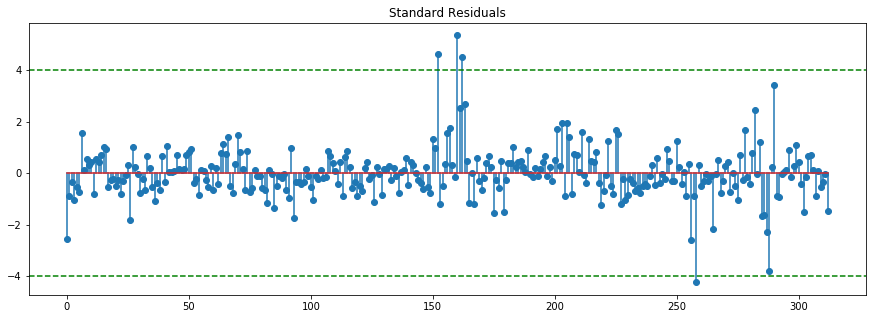

In [216]:
plt.figure(figsize=(15, 5))
plt.stem(result_98105.resid_pearson)
plt.axhline(4, c="g", ls="--")
plt.axhline(-4, c="g", ls="--")
plt.title("Standardized Residuals")
plt.show()

### 영향값

* 회귀모델에서 제외되었을 때 모델에 중요한 변화를 가져오는 관측값을 **주영향관측값(Influential Observation)** 이라고 하고, **레버리지(Leverage)** 가 높다고도 표현한다.

* 레버리지를 측정하는 일반적인 척도는 **햇 값(hat value)** 이다.  $2(P+1) \over n$ 이상의 값들은 레버리지가 높다고 보면 된다.

### 쿡의 거리(Cook's Distance)

* 레버리지와 잔차의 크기를 합쳐서 영향력을 판단한다.  경험적으로 쿡의 거리가 $4 \over (n-P-1)$보다 크면 영향력이 크다고 보는 편이다.

* **영향력그림(Influence Plot)** 또는 **거품그림(Bubble Plot)** 은 표준화잔차, 햇값, 쿸의 거리를 모두 한 그림에 표현해준다.
  
  아래 그림에서 숫자의 크기가 쿡의 거리의 크기이다.

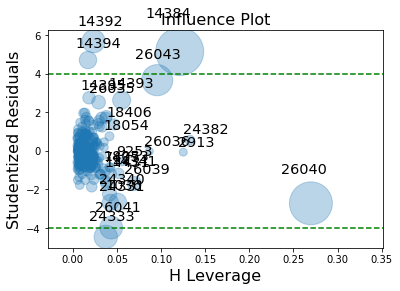

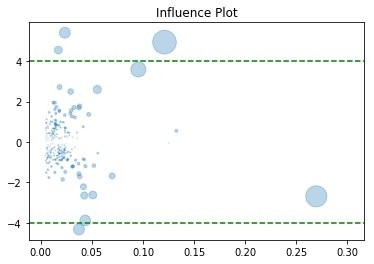

In [261]:
# Bubble plot from statsmodel using influence plot
sm.graphics.influence_plot(result_98105, plot_alpha=0.3)
plt.axhline(4, c="g", ls="--")
plt.axhline(-4, c="g", ls="--")
plt.show()

# Bubble plot using scatter plot
plt.scatter(infl_df.hat_diag, infl_df.standard_resid, s=infl_df.cooks_d*1000, alpha=0.3)
plt.axhline(4, c="g", ls="--")
plt.axhline(-4, c="g", ls="--")
plt.title("Influence Plot")
plt.show()

### 이분산성(heteroscedasticity), 비정규성, 잔차간 상관관계

* 통계적 추론에서는 잔차의 분포가 매우 중요하다.  통계적 추론이 유효하기 위해서는 회귀 모델의 잔차가 1. 동일한 분산을 가지고, 2. 정규분포를 따르며, 3. 잔차가 서로 독립적이어야 한다는 가정이 필요하다. (데이터 과학에서는 크게 중요하지는 않다.)

* 이분산성(Heteroscedasticity)는 잔차의 분산이 일정하지 않고, 특정 범위의 잔차가 다른 데보다 훨씬 크게 나타나는 것을 말한다. 

* 비정규성은 말그대로 잔차가 정규본포를 따르지 않는 것을 말한다.

* 잔차간 상관관계는 잔차가 독립적이지 않고, 상관관계를 가지는 것을 의미한다.  더빈-왓슨 통계량(Dubin-Watson Statistic)을 사용하여 이를 탐지할 수 있다.

* 데이터 과학에서는 위의 3가지 가정보다 중요하게 생각하는 것이 예측 정확도이다.

참고 plotnine: https://plotnine.readthedocs.io/en/stable/index.html

/home/taek/anaconda3/envs/py36/lib/python3.6/site-packages/plotnine/stats/smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
/home/taek/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


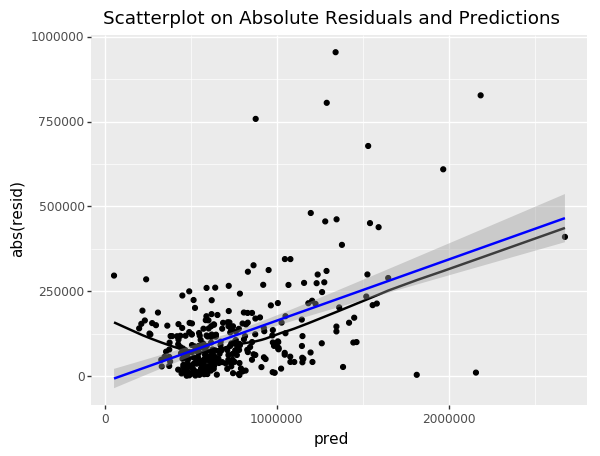

<ggplot: (-9223363284944552995)>

In [326]:
import plotnine
from plotnine import *

ggplot_df = pd.DataFrame(result_98105.resid, columns=['resid'])
ggplot_df['resid'] = abs(ggplot_df['resid'])
ggplot_df['pred'] = result_98105.predict()

(ggplot(ggplot_df, aes(x='pred', y='abs(resid)')) +
     geom_point() +
     geom_smooth() +
     stat_smooth(method='ols', colour='blue', fullrange=True) +    
     ggtitle('Scatterplot on Absolute Residuals and Predictions')
)